# Furness           

In [43]:
import numpy as np

matrix = np.array([[43, 35, 18, 62, 25],
                   [32, 18, 26, 42, 51],
                   [60, 68, 18, 15, 90],
                   [71, 35, 18, 35, 60],
                   [34, 12, 43, 25, 48]], dtype=float)

O_i = [240, 350, 270, 330, 204]
D_j = [300, 220, 160, 420, 294]

f_i = [0] * 5
f_j = [0] * 5

In [44]:
ratio = sum(O_i) / sum(D_j)

if ratio != 1:
    D_j = [i * ratio for i in D_j]
    print("new destination", D_j)
else:
    print("sum(O_i) = sum(D_j)")

sum(O_i) = sum(D_j)


In [45]:
target = sum(O_i)

row = len(O_i)
column = len(O_i)

error_list = []

repeat = 0
error = 0



while  error <1000 :

    if repeat == 0 :
        error=0
        for i in range(row):
            error += abs(D_j[i] - matrix.sum(axis=0, dtype=float).item(i))
            
        for j in range(column):
            error += abs(O_i[j] - matrix.sum(axis=1, dtype=float).item(j))
            
        repeat += 1
        error = 100 * (error / target)

        print('#### Matrix', repeat , ":")
        np.set_printoptions(precision=4, suppress=True)
        print(matrix)
        print('#### %error Matrix', repeat , ":", error)
        print()
        error_list.append(error) 
    
    for i in range(row):
        f_i[i] = O_i[i] / matrix.sum(axis=1, dtype=float).item(i)
 
    for j in range(row):
        for i in range(column): 
             matrix[i][j] = matrix[i][j] * f_i[i]

    #error
    error=0
    for i in range(row):
        error += abs(D_j[i] - matrix.sum(axis=0, dtype=float).item(i))
    error = 100 * (error / target)
    repeat += 1
    
    
    
    print('#### Matrix', repeat , ":")
    np.set_printoptions(precision=4, suppress=True)
    print(matrix)
    print('#### %error Matrix', repeat , ":", error)
    print()
    error_list.append(error) 
    
    if repeat == 30 :
        break

#### Matrix 1 :
[[43. 35. 18. 62. 25.]
 [32. 18. 26. 42. 51.]
 [60. 68. 18. 15. 90.]
 [71. 35. 18. 35. 60.]
 [34. 12. 43. 25. 48.]]
#### %error Matrix 1 : 58.82352941176471

#### Matrix 2 :
[[ 56.3934  45.9016  23.6066  81.3115  32.7869]
 [ 66.2722  37.2781  53.8462  86.9822 105.6213]
 [ 64.5418  73.1474  19.3625  16.1355  96.8127]
 [106.9863  52.7397  27.1233  52.7397  90.411 ]
 [ 42.8148  15.1111  54.1481  31.4815  60.4444]]
#### %error Matrix 2 : 21.71443477664913

#### Matrix 3 :
[[ 56.3934  45.9016  23.6066  81.3115  32.7869]
 [ 66.2722  37.2781  53.8462  86.9822 105.6213]
 [ 64.5418  73.1474  19.3625  16.1355  96.8127]
 [106.9863  52.7397  27.1233  52.7397  90.411 ]
 [ 42.8148  15.1111  54.1481  31.4815  60.4444]]
#### %error Matrix 3 : 21.71443477664913

#### Matrix 4 :
[[ 56.3934  45.9016  23.6066  81.3115  32.7869]
 [ 66.2722  37.2781  53.8462  86.9822 105.6213]
 [ 64.5418  73.1474  19.3625  16.1355  96.8127]
 [106.9863  52.7397  27.1233  52.7397  90.411 ]
 [ 42.8148  15.1111 

### Error value after each iteration

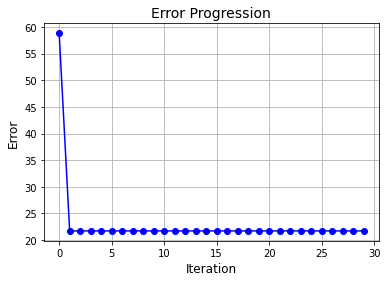

In [46]:
import matplotlib.pyplot as plt

color = 'blue'
marker = 'o'
linestyle = '-'
plt.plot(error_list, color=color, marker=marker, linestyle=linestyle)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error Progression', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True)
plt.show()

# 

# Gravity Distribution Model

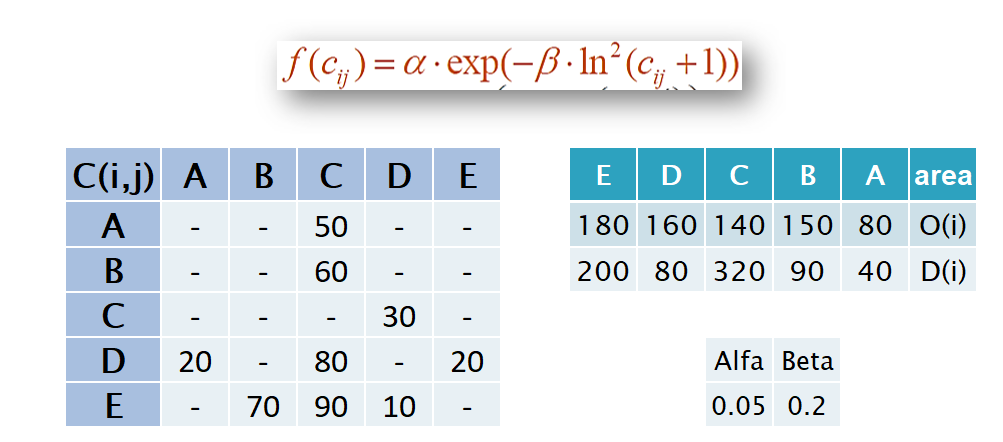

In [57]:
import numpy as np
import pandas as pd
import math


# Read data from Excel file
R = pd.read_excel('D:/Uni/7/haml/HW/HW6/HW6.xlsx')

c_ij = R.iloc[0:5,1:6]
c_ij = c_ij.replace('-', np.inf)
C = np.arange(1, c_ij.shape[1]+1)
c_ij.index = C
c_ij.columns = C
c_ij

O = R.iloc[0,8:13].values.tolist()
D = R.iloc[1,8:13].values.tolist()

Beta = R.iloc[6,10]
alfa = R.iloc[6,9]

print("c_ij:","\n", c_ij, "\nO:", O, "\nD:", D, "\nBeta:", Beta, "\nalfa:", alfa)


c_ij: 
       1     2     3     4     5
1   inf   inf  50.0   inf   inf
2   inf   inf  60.0   inf   inf
3   inf   inf   inf  30.0   inf
4  20.0   inf  80.0   inf  20.0
5   inf  70.0  90.0  10.0   inf 
O: [180.0, 160, 140, 150.0, 80.0] 
D: [200.0, 80, 320, 90.0, 40.0] 
Beta: 0.2 
alfa: 0.05


In [58]:
# sum(O)!=sum(D)?
if sum(O)!=sum(D):
    for i in range (len(O)):
        D[i]= D[i] * (sum(O)/sum(D))

In [59]:
# Get the f(cij)
ln = np.log
def f(cij):
    if cij == np.inf:
        return 0
    A = ln(cij + 1)
    return ((alfa) * math.exp(-1 * Beta * A ** 2))
F = c_ij.applymap(f)
F

,1,2,3,4,5
1,0.000000,0.00000,0.002271,0.000000,0.000000
2,0.000000,0.00000,0.001703,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.004728,0.000000
4,0.007832,0.00000,0.001051,0.000000,0.007832
5,0.000000,0.00132,0.000854,0.015832,0.000000


In [60]:
#Calculate the error on every iteration
iteration = 0
A=[]
B=[]
for i in range(len(D)):
    A.append(0)
    B.append(1)
A = np.array(A)
B = np.array(B)
D = np.array(D)
O = np.array(O)
error_list=[]
e = 100

In [61]:
while e > 1 :
    iteration += 1
    
    # A
    A = np.reciprocal(np.dot(B * D, F.T))
    
    # B
    B = np.reciprocal(np.dot(A * O, F))
         
    #T_ij    
    T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
            
    #Error        
    b = np.sum(np.abs(O - np.sum(T, axis=1))) + np.sum(np.abs(D - np.sum(T, axis=0)))
    e = b * 100 / np.sum(O)
    error_list.append("{:.4f}%".format(e))
    
    print()
    print("Error_matrix" , iteration , ": " , "{:.4f}%".format(e))    
    print("T_matrix" , iteration , ": " ,"\n", T)

    if iteration == 50:
        break


Error_matrix 1 :  38.4861%
T_matrix 1 :  
             1          2           3          4          5
1    0.000000   0.000000  150.878652   0.000000   0.000000
2    0.000000   0.000000  134.114357   0.000000   0.000000
3    0.000000   0.000000    0.000000  61.353516   0.000000
4  194.520548   0.000000   19.189788   0.000000  39.648416
5    0.000000  78.396672   10.099383  27.743044   0.000000

Error_matrix 2 :  29.9573%
T_matrix 2 :  
             1          2           3          4          5
1    0.000000   0.000000  157.881379   0.000000   0.000000
2    0.000000   0.000000  140.339003   0.000000   0.000000
3    0.000000   0.000000    0.000000  78.403560   0.000000
4  194.520548   0.000000    9.965152   0.000000  39.648416
5    0.000000  78.396672    6.096646  10.693001   0.000000

Error_matrix 3 :  26.7693%
T_matrix 3 :  
             1          2           3          4          5
1    0.000000   0.000000  161.057140   0.000000   0.000000
2    0.000000   0.000000  143.161902   0.0

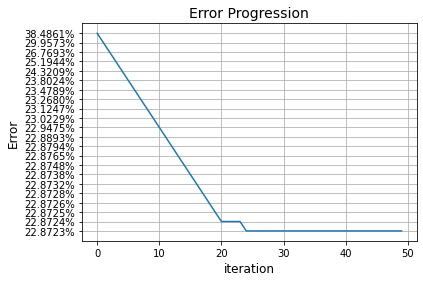

In [62]:
import matplotlib.pyplot as plt

plt.plot(range(len(error_list)), error_list)
plt.xlabel('iteration', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error Progression', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True)

plt.gca().invert_yaxis()

plt.show()
